# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## 웹 크롤링 2/2

## 웹 자료를 이용한 데이터 분석 2

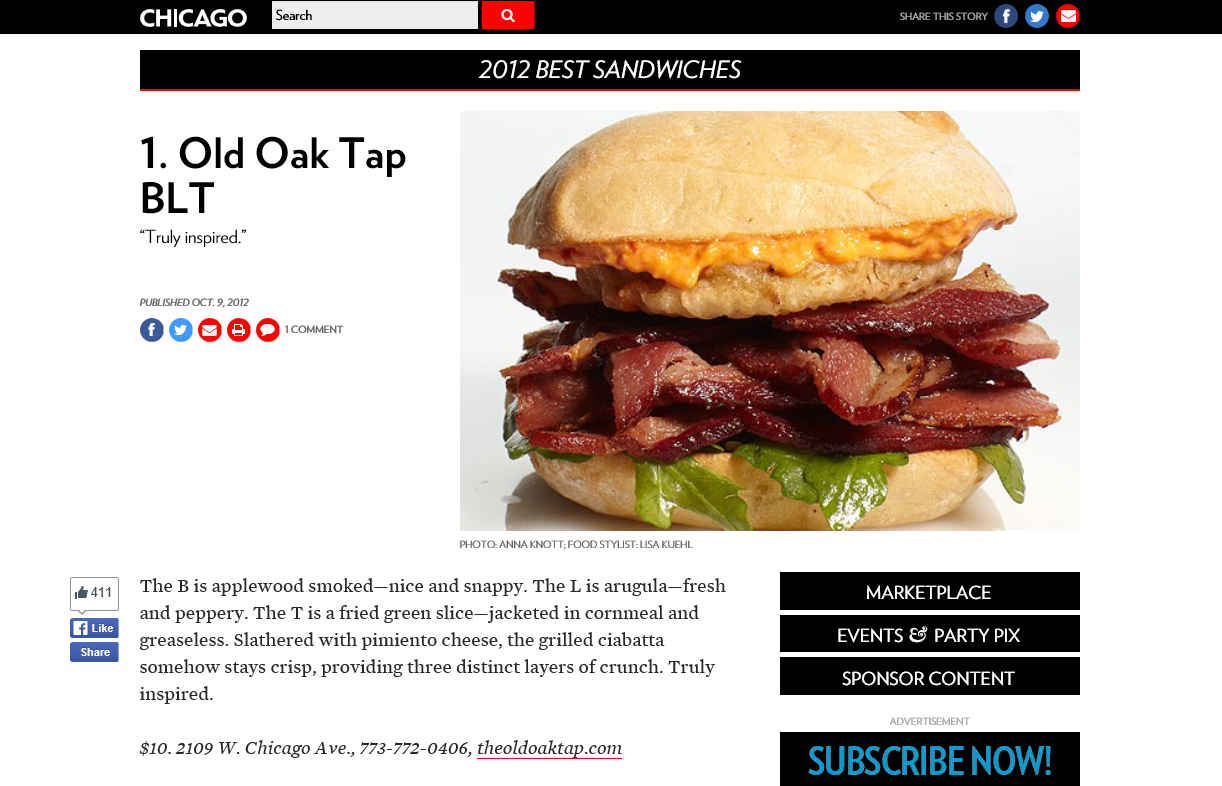

In [1]:
from images import bigpycraft_bda as bpc
from IPython.display import Image 

Image(bpc.BDA_PE_412_1)

In [2]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd
import re

#### <font color='blue'> # 웹크롤링한 데이터 읽어오기 </font>

In [3]:
# df = pd.read_csv('data/exam-WebParsing.csv')       
df = pd.read_csv('data/chicagomag_info.csv', index_col='Rank') 
df.head()

,Unnamed: 0,Cafe,Menu,URL
Rank,,,,
1,0,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,1,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,2,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,3,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...
5,4,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...


In [4]:
# index_col='Unnamed: 0'') 삭제
del df['Unnamed: 0']
df.head()

,Cafe,Menu,URL
Rank,,,
1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...
5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 3 columns):
Cafe    50 non-null object
Menu    50 non-null object
URL     50 non-null object
dtypes: object(3)
memory usage: 1.6+ KB


In [6]:
df['Menu'][1]

'BLT'

In [7]:
df['URL'][1]

'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'

#### <font color='blue'> # 첫번째 URL 페이지 크롤링하기 </font>

In [8]:
html = urlopen(df['URL'][1])
soup = BeautifulSoup(html, "lxml")
soup.title
# type(soup)

<title>
  1. Old Oak Tap BLT |
  Chicago magazine
      |  November 2012
    </title>

In [9]:
soup.find('p', 'addy')

<p class="addy">
<em>$10. 2109 W. Chicago Ave., 773-772-0406, <a href="http://www.theoldoaktap.com/">theoldoaktap.com</a></em></p>

In [10]:
taginfo = soup.find('p', 'addy').get_text()
taginfo

'\n$10. 2109 W. Chicago Ave., 773-772-0406, theoldoaktap.com'

In [11]:
taginfo = taginfo[taginfo.find('$'):]
taginfo

'$10. 2109 W. Chicago Ave., 773-772-0406, theoldoaktap.com'

### <font color='brown'> Regular Expression 관련 사이트
- http://regexr.com/   : text 정보를 re로 테스트
- https://regexper.com/ : 작성된 re를 다이어그램으로 표현

In [12]:
price = re.search('\$\d+\.(\d+)?', taginfo).group()
price

'$10.'

In [13]:
address = '일단보류'    # Street, City

In [14]:
phone = re.search('\d{3}[-]\d{3}[-]\d{4}', taginfo)
if phone is not None:
    phone = phone.group()
phone

'773-772-0406'

In [15]:
infolist = taginfo.split(', ')
if infolist[-1].endswith('.com') or infolist[-1].endswith('.net'):
    homepage = infolist[-1]
else:
    homepage = 'No Homepage'
homepage

'theoldoaktap.com'

In [16]:
start = len(price)
if phone is None:
    phone = 'No Contact'
    end = taginfo.find(homepage)
else:
    end = taginfo.find(phone)
    
address = taginfo[start:end]
address

' 2109 W. Chicago Ave., '

#### <font color='blue'> # 상위 TOP3 페이지에서 가격과 주소정보만 읽어오기  </font>

In [17]:
Price    = []
Address  = []
Phone    = []
Homepage = []

for n in [1,2,3,4,5]:   
    html = urlopen(df['URL'][n])
    soup = BeautifulSoup(html, 'lxml')
    
    taginfo = soup.find('p', 'addy').get_text()
    taginfo = taginfo[taginfo.find('$'):]
    
    price = re.search('\$\d+\.(\d+)?', taginfo).group()
    
    address = '일단보류'    # Street, City
    
    phone = re.search('\d{3}[-]\d{3}[-]\d{4}', taginfo)
    if phone is not None:
        phone = phone.group()    
        
    infolist = taginfo.split(', ')
    if infolist[-1].endswith('.com') or infolist[-1].endswith('.net'):
        homepage = infolist[-1]
    else:
        homepage = 'No Homepage'

    start = len(price)
    if phone is None:
        phone = 'No Contact'
        end = taginfo.find(homepage)
    else:
        end = taginfo.find(phone)

    address = taginfo[start:end] 

    Price.append(price)
    Address.append(address)
    Phone.append(phone)
    Homepage.append(homepage)
    
    print(n)

1
2
3
4
5


In [18]:
Price

['$10.', '$9.', '$9.50', '$9.40', '$10.']

In [19]:
Address

[' 2109 W. Chicago Ave., ',
 ' 800 W. Randolph St., ',
 '. 445 N. Clark St., ',
 '. 914 Noyes St., Evanston, ',
 ' 825 W. Fulton Mkt., ']

In [20]:
Phone

['773-772-0406',
 '312-929-4580',
 '312-334-3688',
 '847-475-9400',
 '312-445-8977']

In [21]:
Homepage

['theoldoaktap.com',
 'aucheval.tumblr.com',
 'rickbayless.com',
 'alsdeli.net',
 'publicanqualitymeats.com']

In [22]:
price = Price[0]
if price.endswith('.'):
    price = price[:-1]
price

'$10'

In [23]:
address = Address[2]
address = address[:-2]
if address.startswith('.'):
    address = address[1:]
address = address.strip()
address

'445 N. Clark St.'

#### <font color='blue'> # 가격과 주소정보를 수정보완 </font>

In [24]:
Price    = []
Address  = []
Phone    = []
Homepage = []

for n in [1,2,3,4,5]:   
    html = urlopen(df['URL'][n])
    soup = BeautifulSoup(html, 'lxml')
    
    taginfo = soup.find('p', 'addy').get_text()
    taginfo = taginfo[taginfo.find('$'):]
    
    price = re.search('\$\d+\.(\d+)?', taginfo).group()
    # price update
    if price.endswith('.'):
        price = price[:-1]
        
    address = '일단보류'    # Street, City
    
    phone = re.search('\d{3}[-]\d{3}[-]\d{4}', taginfo)
    if phone is not None:
        phone = phone.group()    
        
    infolist = taginfo.split(', ')
    if infolist[-1].endswith('.com') or infolist[-1].endswith('.net'):
        homepage = infolist[-1]
    else:
        homepage = 'No Homepage'

    start = len(price)
    if phone is None:
        phone = 'No Contact'
        end = taginfo.find(homepage)
    else:
        end = taginfo.find(phone)

    address = taginfo[start:end] 
    # address update
    address = address[:-2]
    if address.startswith('.'):
        address = address[1:]
    address = address.strip()
    
    Price.append(price)
    Address.append(address)
    Phone.append(phone)
    Homepage.append(homepage)
    
    print(n)

1
2
3
4
5


In [25]:
Price

['$10', '$9', '$9.50', '$9.40', '$10']

In [26]:
Address

['2109 W. Chicago Ave.',
 '800 W. Randolph St.',
 '445 N. Clark St.',
 '914 Noyes St., Evanston',
 '825 W. Fulton Mkt.']

#### <font color='blue'> # 만약 문제가 없다면, 전체 정보를 한번에 다 가져오기 </font>

In [27]:
Price    = []
Address  = []
Phone    = []
Homepage = []

for n in df.index:
    html = urlopen(df['URL'][n])
    soup = BeautifulSoup(html, 'lxml')
    
    taginfo = soup.find('p', 'addy').get_text()
    taginfo = taginfo[taginfo.find('$'):]
    
    price = re.search('\$\d+\.(\d+)?', taginfo).group()
    # price update
    if price.endswith('.'):
        price = price[:-1]
        
    address = '일단보류'    # Street, City
    
    phone = re.search('\d{3}[-]\d{3}[-]\d{4}', taginfo)
    if phone is not None:
        phone = phone.group()    
        
    infolist = taginfo.split(', ')
    if infolist[-1].endswith('.com') or infolist[-1].endswith('.net'):
        homepage = infolist[-1]
    else:
        homepage = 'No Homepage'

    start = len(price)
    if phone is None:
        phone = 'No Contact'
        end = taginfo.find(homepage)
    else:
        end = taginfo.find(phone)

    address = taginfo[start:end] 
    # address update
    address = address[:-2]
    if address.startswith('.'):
        address = address[1:]
    address = address.strip()
    
    Price.append(price)
    Address.append(address)
    Phone.append(phone)
    Homepage.append(homepage)
    
    print('webpage crawling...{}'.format(n))

webpage crawling...1
webpage crawling...2
webpage crawling...3
webpage crawling...4
webpage crawling...5
webpage crawling...6
webpage crawling...7
webpage crawling...8
webpage crawling...9
webpage crawling...10
webpage crawling...11
webpage crawling...12
webpage crawling...13
webpage crawling...14
webpage crawling...15
webpage crawling...16
webpage crawling...17
webpage crawling...18
webpage crawling...19
webpage crawling...20
webpage crawling...21
webpage crawling...22
webpage crawling...23
webpage crawling...24
webpage crawling...25
webpage crawling...26
webpage crawling...27
webpage crawling...28
webpage crawling...29
webpage crawling...30
webpage crawling...31
webpage crawling...32
webpage crawling...33
webpage crawling...34
webpage crawling...35
webpage crawling...36
webpage crawling...37
webpage crawling...38
webpage crawling...39
webpage crawling...40
webpage crawling...41
webpage crawling...42
webpage crawling...43
webpage crawling...44
webpage crawling...45
webpage crawling...

In [28]:
Price

['$10',
 '$9',
 '$9.50',
 '$9.40',
 '$10',
 '$7.25',
 '$16',
 '$10',
 '$9',
 '$17',
 '$11',
 '$5.49',
 '$14',
 '$10',
 '$13',
 '$4.50',
 '$11.95',
 '$11.50',
 '$6.25',
 '$15',
 '$5',
 '$6',
 '$8',
 '$5.99',
 '$7.52',
 '$11.95',
 '$7.50',
 '$12.95',
 '$7',
 '$21',
 '$9.79',
 '$9.75',
 '$13',
 '$7.95',
 '$9',
 '$9',
 '$8',
 '$8',
 '$7',
 '$6',
 '$7.25',
 '$11',
 '$6',
 '$9',
 '$5.49',
 '$8',
 '$6.50',
 '$7.50',
 '$8.75',
 '$6.85']

In [30]:
Address

['2109 W. Chicago Ave.',
 '800 W. Randolph St.',
 '445 N. Clark St.',
 '914 Noyes St., Evanston',
 '825 W. Fulton Mkt.',
 '100 E. Walton St.',
 '1639 S. Wabash Ave.',
 '2211 W. North Ave.',
 '3619 W. North Ave.',
 '3267 S. Halsted St.',
 '2537 N. Kedzie Blvd.',
 'Multiple locations',
 '3124 N. Broadway',
 '3455 N. Southport Ave.',
 '2657 N. Kedzie Ave.',
 '1120 W. Grand Ave.',
 '1141 S. Jefferson St.',
 '333 E. Benton Pl.',
 '1411 N. Wells St.',
 '1747 N. Damen Ave.',
 '3209 W. Irving Park Rd.',
 'Multiple locations',
 '5347 N. Clark St.',
 '2954 W. Irving Park Rd.',
 'Multiple locations',
 '191 Skokie Valley Rd., Highland Park',
 'Multiple locations',
 '1818 W. Wilson Ave.',
 '2517 W. Division St.',
 '218 W. Kinzie St.',
 'Multiple locations',
 '1547 N. Wells St.',
 '415 N. Milwaukee Ave.',
 '1840 N. Damen Ave.',
 '1220 W. Webster Ave.',
 '5357 N. Ashland Ave.',
 '1834 W. Montrose Ave.',
 '615 N. State St.',
 'Multiple locations',
 '241 N. York Rd., Elmhurst',
 '1323 E. 57th St.',
 '6

In [31]:
Phone

['773-772-0406',
 '312-929-4580',
 '312-334-3688',
 '847-475-9400',
 '312-445-8977',
 '312-649-6717',
 '312-360-9500',
 '773-276-2100',
 '773-772-8435',
 '312-929-2486',
 '773-489-9554',
 'No Contact',
 '773-661-9166',
 '773-883-2525',
 '773-276-7110',
 '312-666-0730',
 '312-939-2855',
 '773-234-3449',
 '312-944-0459',
 '773-489-1747',
 '773-539-8038',
 'No Contact',
 '773-275-5725',
 '773-539-5321',
 'No Contact',
 '847-831-0600',
 'No Contact',
 '773-293-2489',
 '773-862-8313',
 '312-624-8154',
 'No Contact',
 '312-624-9430',
 '312-829-6300',
 '773-681-9914',
 '773-883-1313',
 '773-275-4297',
 '773-334-5664',
 '312-265-0434',
 'No Contact',
 '630-516-3354',
 '773-538-7372',
 '847-234-8800',
 '312-254-4665',
 '708-725-7200',
 '312-922-2233',
 '773-384-9930',
 '312-896-2600',
 '630-359-5234',
 '312-726-2020',
 '773-868-4000']

In [32]:
Homepage

['theoldoaktap.com',
 'aucheval.tumblr.com',
 'rickbayless.com',
 'alsdeli.net',
 'publicanqualitymeats.com',
 'No Homepage',
 'acadiachicago.com',
 'birchwoodkitchen.com',
 'cemitaspuebla.com',
 'nanaorganic.com',
 'lulacafe.com',
 'ricobenespizza.com',
 'frognsnail.com',
 'crosbyskitchenchicago.com',
 'longmanandeagle.com',
 'bariitaliansubs.com',
 'mannysdeli.com',
 'eggysdiner.com',
 'oldjerusalemchicago.com',
 'hotchocolatechicago.com',
 'No Homepage',
 'dawalikitchen.com',
 'bigjoneschicago.com',
 'lapanechicago.com',
 'pastoralartisan.com',
 'maxs-deli.com',
 'luckysandwich.com',
 'cityprovisions.com',
 'papascachesabroso.com',
 'No Homepage',
 'hannahsbretzel.com',
 'lafournette.com',
 'paramountroom.com',
 'meltsandwichshoppechicago.com',
 'floriole.com',
 'No Homepage',
 'troquetchicago.com',
 'grahamwich.com',
 'saigonsisters.com',
 'rosaliasdeli.com',
 'zhmarketcafe.com',
 'themarkethouse.com',
 'No Homepage',
 'marionstreetcheesemarket.com',
 'cafecitochicago.com',
 'chick

In [33]:
len(df), len(Price), len(Address), len(Phone), len(Homepage)

(50, 50, 50, 50, 50)

#### <font color='blue'> # 기존 데이터에 칼럼(가격, 주소) 추가하기 </font>

In [34]:
df['Price'] = Price
df.head()

,Cafe,Menu,URL,Price
Rank,,,,
1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...,$10
2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9
3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9.50
4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9.40
5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...,$10


In [35]:
df['Address'] = Address
df.head()

,Cafe,Menu,URL,Price,Address
Rank,,,,,
1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...,$10,2109 W. Chicago Ave.
2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9,800 W. Randolph St.
3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9.50,445 N. Clark St.
4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9.40,"914 Noyes St., Evanston"
5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...,$10,825 W. Fulton Mkt.


In [36]:
df['Phone'] = Phone
df.head()

,Cafe,Menu,URL,Price,Address,Phone
Rank,,,,,,
1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...,$10,2109 W. Chicago Ave.,773-772-0406
2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9,800 W. Randolph St.,312-929-4580
3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9.50,445 N. Clark St.,312-334-3688
4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9.40,"914 Noyes St., Evanston",847-475-9400
5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...,$10,825 W. Fulton Mkt.,312-445-8977


In [37]:
df['Homepage'] = Homepage
df.head()

,Cafe,Menu,URL,Price,Address,Phone,Homepage
Rank,,,,,,,
1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...,$10,2109 W. Chicago Ave.,773-772-0406,theoldoaktap.com
2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9,800 W. Randolph St.,312-929-4580,aucheval.tumblr.com
3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9.50,445 N. Clark St.,312-334-3688,rickbayless.com
4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9.40,"914 Noyes St., Evanston",847-475-9400,alsdeli.net
5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...,$10,825 W. Fulton Mkt.,312-445-8977,publicanqualitymeats.com


In [38]:
cols = list(df)
cols

['Cafe', 'Menu', 'URL', 'Price', 'Address', 'Phone', 'Homepage']

In [39]:
cols.index('URL')

2

In [40]:
cols[6]

'Homepage'

In [41]:
# cols.insert(6, cols.pop(cols.index('URL')))
cols.append(cols.pop(cols.index('URL')))
cols

['Cafe', 'Menu', 'Price', 'Address', 'Phone', 'Homepage', 'URL']

In [42]:
df.head()

,Cafe,Menu,URL,Price,Address,Phone,Homepage
Rank,,,,,,,
1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...,$10,2109 W. Chicago Ave.,773-772-0406,theoldoaktap.com
2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9,800 W. Randolph St.,312-929-4580,aucheval.tumblr.com
3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9.50,445 N. Clark St.,312-334-3688,rickbayless.com
4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...,$9.40,"914 Noyes St., Evanston",847-475-9400,alsdeli.net
5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...,$10,825 W. Fulton Mkt.,312-445-8977,publicanqualitymeats.com


#### <font color='blue'> # ix 를 사용하면 컬럼과 레코드전체가 옮겨진다. </font>

In [43]:
df = df.ix[:, cols]
df.head()

C:\Python\Anaconda3-50\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Cafe,Menu,Price,Address,Phone,Homepage,URL
Rank,,,,,,,
1,Old Oak Tap,BLT,$10,2109 W. Chicago Ave.,773-772-0406,theoldoaktap.com,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,Au Cheval,Fried Bologna,$9,800 W. Randolph St.,312-929-4580,aucheval.tumblr.com,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,Xoco,Woodland Mushroom,$9.50,445 N. Clark St.,312-334-3688,rickbayless.com,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,Al’s Deli,Roast Beef,$9.40,"914 Noyes St., Evanston",847-475-9400,alsdeli.net,http://www.chicagomag.com/Chicago-Magazine/Nov...
5,Publican Quality Meats,PB&L,$10,825 W. Fulton Mkt.,312-445-8977,publicanqualitymeats.com,http://www.chicagomag.com/Chicago-Magazine/Nov...


In [44]:
df = df.loc[:, cols]
df.head()

,Cafe,Menu,Price,Address,Phone,Homepage,URL
Rank,,,,,,,
1,Old Oak Tap,BLT,$10,2109 W. Chicago Ave.,773-772-0406,theoldoaktap.com,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,Au Cheval,Fried Bologna,$9,800 W. Randolph St.,312-929-4580,aucheval.tumblr.com,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,Xoco,Woodland Mushroom,$9.50,445 N. Clark St.,312-334-3688,rickbayless.com,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,Al’s Deli,Roast Beef,$9.40,"914 Noyes St., Evanston",847-475-9400,alsdeli.net,http://www.chicagomag.com/Chicago-Magazine/Nov...
5,Publican Quality Meats,PB&L,$10,825 W. Fulton Mkt.,312-445-8977,publicanqualitymeats.com,http://www.chicagomag.com/Chicago-Magazine/Nov...


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 7 columns):
Cafe        50 non-null object
Menu        50 non-null object
Price       50 non-null object
Address     50 non-null object
Phone       50 non-null object
Homepage    50 non-null object
URL         50 non-null object
dtypes: object(7)
memory usage: 5.6+ KB


#### <font color='blue'> # 추가로 변경작업한 데이터 파일로 저장하기 </font>

In [46]:
df.to_csv('data/chicagomag_info2.csv', sep=',', encoding='UTF-8')

In [47]:
% ls data

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>